In [1]:
import pandas as pd
from time import sleep
from random import shuffle

In [5]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [3]:
insta.get_follow('followers')

.....................................................

In [4]:
insta.get_follow('following')

.................................................................

In [6]:
insta.get_photos()

In [2]:
follower = pd.read_pickle('followers.pickle')
follower.shape

(755, 6)

In [3]:
following = pd.read_pickle('following.pickle')
following.shape

(1049, 6)

In [7]:
following_not_follower = [x for x in following['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

673 ['pycoders', 'raquelchircop', 'ai_machine_learning', 'chapolinsincero', 'raropizza', 'wired', 'businessweek', 'rosyfranchipasquin', 'cesarssalim', 'vtbellini', 'danovaester', 'gemudinhas', 'cosmojoseroberto', 'wilson_svieira', 'lulubasile', 'joaopiresinsta', 'claudionegon', 'danyel.fonseca', 'leticiadiasverona', 'lunacostaol', 'atatipelomundo', 'marcella_blok', 'julianasfonseca', 'jonathanavis', 'andrebastos187', 'alfredoborgesp', 'drppacheco', 'cristianacamarate', 'mianafelipe', 'ernanisouzacosta', 'marcoaur.oficial', 'jineriebetancurt', 'ysdomingues', 'dra.chrisprado', 'showdajessica', 'matheusbo', '13allan', 'raquelflinker', 'bielo_m', 'beatriz.cabral.felicidade', 'seu_hulk', 'leandrogrisoni', 'allinetblemos', 'mnrcruz85', 'wearedefcon', 'birinasdoguana', 'isphus1973', 'filipedeschamps', 'juliacfranco', 'robertobscosta', 'gavic37', 'psicologa_julianovaes', 'julipima', 'recreiocanoas', 'canoada_vila', 'pauloalvesromao', 'martal.borges', 'raspberrypifoundation', 'monique.rj', 'jos

In [8]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

360 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [9]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,340,340,340,340,340
Seguir,395,395,395,395,395
Solicitado,20,20,20,20,20


In [10]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [11]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
754,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,linanielsen27,Lina Nielsen,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/15...
753,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,elizete_martoni,Elizete Martoni,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/0c...
752,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,jadeycarvalho,Jadey Carvalho Rufino,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/5f...
751,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,archanja_archanja,Archanja Sacramento,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/d4...
750,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,lucianavcordeiro,Luciana Cordeiro,Seguindo,https://scontent-gig2-1.cdninstagram.com/vp/d9...
749,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,cryptobullsfamily,Cryptocurrency > Market Update,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/cc...
748,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,najarasilvaatleta,Najara Athayde,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/8c...
747,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,derso_style,Anderson.Antonio,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/05...
746,2019-08-12 17:26:32.776573,2019-08-12 17:26:32.776573,fabiananunes814,fabiana nunes,Seguir,https://scontent-gig2-1.cdninstagram.com/vp/66...
712,2019-08-11 22:04:21.379448,2019-08-12 17:26:32.776573,saborencia,Saborência,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c7b...


In [12]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...


In [13]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
1048,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,feeh_tiago,Felypee Thiago,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2a7...
1013,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,hildaoliveira57642,Hilda Oliveira 🙆,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/20e...
1023,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,gabimuguet,Gabriela Muguet,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/af4...
1021,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,alinee_figueiredoo,Aline Figueiredo,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/670...
1020,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,_igoorlopes,Igor Lopes,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/624...
1019,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,luziane_aquino,Luziane Araújo,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3eb...
1018,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,emile_naiade,Emile Miranda,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a59...
1017,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,ara.cursos1,ARA Cursos em Saude,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/593...
1016,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,jullyano_trevisol,Jullyano Trevisol,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/815...
1015,2019-08-11 22:11:30.063121,2019-08-11 22:11:30.063121,june.nutri,June Nutri,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/99e...


In [14]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
578,2019-08-03 16:31:25.281430,2019-08-04 17:50:28.684857,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
431,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,araujodiogoo,Diogo Araujo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/80...
590,2019-08-04 22:13:41.081369,2019-08-04 22:13:41.081369,bemartins.ml,Bernardo Martins,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6b9...
610,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,maiarabarreto,Maiara Barreto,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4e6...
609,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,simone_menezes5,Simone,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ec2...
608,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,renatacartagenes,Renata Cartagenes Ferreira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e33...
606,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,rick_f_r_a_s_e_s_,Ricardo Oliveira.❤,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/489...
605,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,psico.loga,Psi,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1f5...
604,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,trlynek97,🌻,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2dd...


In [15]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [16]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
818,2019-07-30 10:29:44.220296,2019-08-06 16:21:23.181522,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
897,2019-07-30 10:29:44.220296,2019-08-11 22:11:30.063121,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-09 08:32:17.126650,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-08-12 17:26:32.776573,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
580,2019-08-06 18:13:11.314843,2019-08-12 17:26:32.776573,85millysantos,Jamilly Santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/9e1...
620,2019-08-07 19:51:20.508949,2019-08-12 17:26:32.776573,______lor.rabbit,lor rabbit,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1be...
197,2019-07-29 22:30:54.216241,2019-08-11 22:04:21.379448,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
1435,2019-08-06 17:00:23.497341,2019-08-07 22:52:36.378524,_bimiranda,Bianca,Seguindo,https://instagram.fbtz1-5.fna.fbcdn.net/vp/b2d...
598,2019-08-07 19:51:20.508949,2019-08-12 17:26:32.776573,_direitonapratica_,Samanta Pimenta,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2f5...


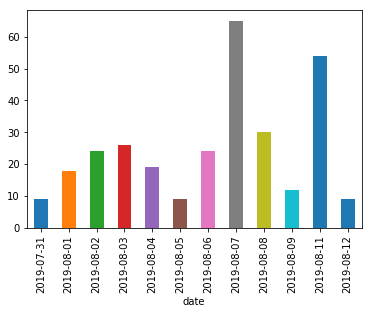

In [18]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar')

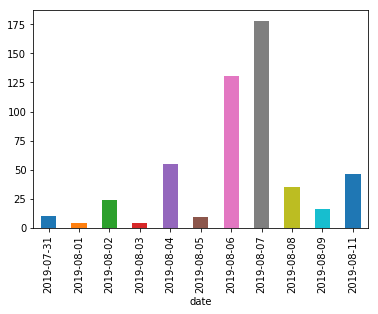

In [19]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')

In [21]:
shuffle(following_not_follower)
following_not_follower


['andre_godoi18',
 'marcomontrasi',
 'vitorcostax',
 'geeks_for_geeks',
 'francys_mara',
 'pfogatha',
 'vitorquezada',
 'thomaz_br',
 'wilson_svieira',
 'sregairap',
 'ngrionc',
 'guiaganharmassa',
 'engepax',
 'chapolinsincero',
 'vilmarinamachado',
 'devaprender',
 'larissadias506',
 'pryllucas',
 'tavarezy',
 'talles.perfister',
 'miguelcarlosofcial',
 'jerckns.cruz',
 'jaanaynamaldonado',
 'isphus1973',
 'rick_f_r_a_s_e_s_',
 'carlosviniciusalvesribeiro',
 'elessandramarquesmarques',
 'raquelchircop',
 'danielhrs',
 'psicologaclaracarr',
 'tania_m_martins',
 'rita_daniels',
 'davi__snts',
 'sirajraval',
 'tamissouto',
 'kyttasama',
 'cosmojoseroberto',
 'matheus_iurd',
 'lopesvaleriagomes',
 'myncoachs24',
 'gustavodelyra',
 'tchos',
 'joana.cruz_',
 'microsoftbr',
 'dmcoelhofotografia',
 'npe_eng',
 'alfonso.jara.rojas',
 'vitolannew',
 'lelekagaspar',
 'minipoint_libertese',
 'ai_machine_learning',
 'chupacabras.rugbybauru',
 'nanda_rocha__.21',
 'anapaulajelihovschi',
 'nayarapi

In [22]:
for user in following_not_follower[:50]:
    try:
        insta.unfollow_user(user)
        sleep(.3)
    except:
        print('unfollow ',user)

Unfollowing  andre_godoi18
Unfollowing  marcomontrasi
Unfollowing  vitorcostax
Unfollowing  geeks_for_geeks
erro  Seguir francys_mara
erro  Seguir pfogatha
Unfollowing  vitorquezada
Unfollowing  thomaz_br
erro  Seguir wilson_svieira
erro  Seguir sregairap
Unfollowing  ngrionc
Unfollowing  guiaganharmassa
Unfollowing  engepax
erro  Seguir chapolinsincero
Unfollowing  vilmarinamachado
erro  Seguir devaprender
erro  Seguir larissadias506
Unfollowing  pryllucas
erro  Seguir tavarezy
Unfollowing  talles.perfister
Unfollowing  miguelcarlosofcial
Unfollowing  jerckns.cruz
unfollow  jaanaynamaldonado
erro  Seguir isphus1973
erro  Seguir rick_f_r_a_s_e_s_
erro  Seguir carlosviniciusalvesribeiro
Unfollowing  elessandramarquesmarques
unfollow  raquelchircop
Unfollowing  danielhrs
Unfollowing  psicologaclaracarr
erro  Seguir tania_m_martins
Unfollowing  rita_daniels
Unfollowing  davi__snts
Unfollowing  sirajraval
Unfollowing  tamissouto
Unfollowing  kyttasama
erro  Seguir cosmojoseroberto
erro  Se